In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Products - Data Quality Issues 

## Completeness
 Are there any NULL values for any rows for any fields?

In [3]:
# Create pandas dataframe from csv and get summary of columns and null counts to check for data completeness
products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


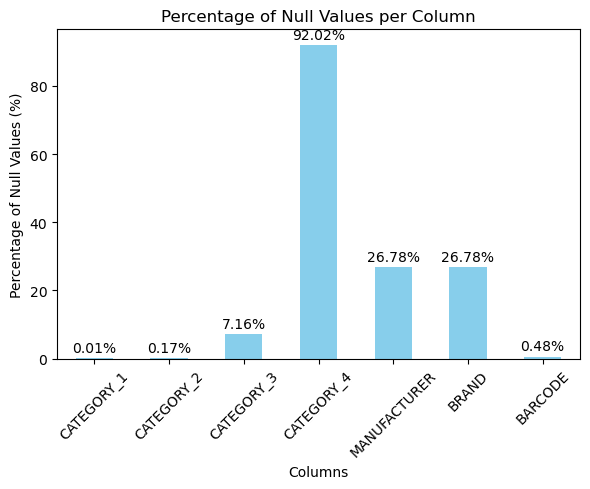

In [4]:
# Create bar graph that shows percentage of null values per column
null_percentage = products.isnull().mean() * 100
plt.figure(figsize=(6, 5))
ax = null_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values (%)')
plt.xticks(rotation=45)

for i, v in enumerate(null_percentage):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

## Validity
 For non-null values, do they make sense for their respective columns?

In [5]:
# Find unique values and counts for the BARCODE column which acts like the ID column for this dataset
# Filter this to find instances of duplicate values
value_counts = products['BARCODE'].value_counts()
filtered_value_counts = value_counts[value_counts > 1]

print(filtered_value_counts)

3423905.0     2
3416105.0     2
20146900.0    2
3454206.0     2
3462003.0     2
             ..
13468439.0    2
3465608.0     2
3424001.0     2
20012274.0    2
20259044.0    2
Name: BARCODE, Length: 185, dtype: int64


In [6]:
# Look at examples of duplicate BARCODEs to check for differences in other columns (confirm these are actually duplicates)
print(products[products['BARCODE'] == 3423905])
print(products[products['BARCODE'] == 20259044])

       CATEGORY_1 CATEGORY_2       CATEGORY_3 CATEGORY_4         MANUFACTURER  \
612573     Snacks      Candy  Chocolate Candy        NaN  THE HERSHEY COMPANY   
827242     Snacks      Candy  Chocolate Candy        NaN  THE HERSHEY COMPANY   

            BRAND    BARCODE  
612573  HERSHEY'S  3423905.0  
827242  HERSHEY'S  3423905.0  
       CATEGORY_1 CATEGORY_2       CATEGORY_3 CATEGORY_4 MANUFACTURER BRAND  \
250899     Snacks      Candy  Chocolate Candy        NaN          NaN   NaN   
527001     Snacks      Candy  Chocolate Candy        NaN          NaN   NaN   

           BARCODE  
250899  20259044.0  
527001  20259044.0  


In [7]:
# Find unique values and counts for the CATEGORY_1 column, looking for invalid values for this column
category_1_value_counts = products['CATEGORY_1'].value_counts().sort_values(ascending=False)

print(category_1_value_counts)

Health & Wellness         512695
Snacks                    324817
Beverages                   3990
Pantry                       871
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      503
Home & Garden                115
Restaurant                    69
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: CATEGORY_1, dtype: int64


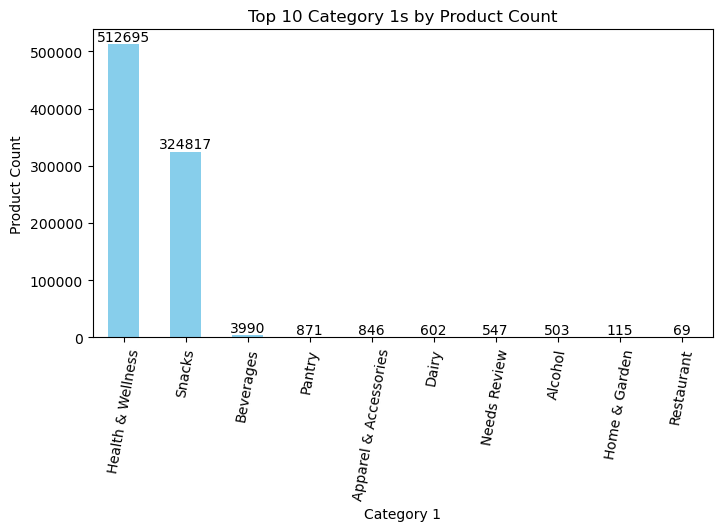

In [8]:
top_10_category_1_counts = category_1_value_counts.nlargest(10)

# Create the pie chart
ax = top_10_category_1_counts.plot(kind='bar', color='skyblue', figsize=(8, 4))

# Show the chart
plt.title('Top 10 Category 1s by Product Count')
plt.xlabel('Category 1')
plt.xticks(rotation=80)
plt.ylabel('Product Count') 

for i, v in enumerate(top_10_category_1_counts):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

In [9]:
# Find unique values and counts for the CATEGORY_2 column, looking for invalid values for this column
category_2_value_counts = products['CATEGORY_2'].value_counts().sort_values(ascending=False)

print(category_2_value_counts)

Candy                      121036
Hair Care                  111482
Medicines & Treatments      99118
Bath & Body                 81469
Skin Care                   62587
                            ...  
Pool, Spa & Accessories         1
Baby & Toddler Feeding          1
Household Appliances            1
Shipping Supplies               1
Baby Transport                  1
Name: CATEGORY_2, Length: 121, dtype: int64


In [10]:
# Find unique values and counts for the CATEGORY_3 column, looking for invalid values for this column
category_3_value_counts = products['CATEGORY_3'].value_counts().sort_values(ascending=False)

print(category_3_value_counts)

Confection Candy                 56965
Vitamins & Herbal Supplements    55700
Chocolate Candy                  47710
Hair Styling Products            20450
Reading Glasses                  20394
                                 ...  
Cycling                              1
Orange Juice                         1
Slot Machines                        1
Cocktail Sauces                      1
Baby Carriers                        1
Name: CATEGORY_3, Length: 344, dtype: int64


In [11]:
# Find unique values and counts for the CATEGORY_4 column, looking for invalid values for this column
category_4_value_counts = products['CATEGORY_4'].value_counts().sort_values(ascending=False)

print(category_4_value_counts)

Lip Balms                      9737
Already Popped Popcorn         6974
Sleep Aids                     4978
Hair Brushes & Combs           4724
Women's Shaving Gel & Cream    3874
                               ... 
Replacement Drink Lids            1
Baby & Toddler Outfits            1
Variety Pack Sodas                1
Chili Sauce                       1
Spices                            1
Name: CATEGORY_4, Length: 127, dtype: int64


In [12]:
# Find unique values and counts for the MANUFACTURER column, looking for invalid values for this column
manufacturer_value_counts = products['MANUFACTURER'].value_counts().sort_values(ascending=False)

print(manufacturer_value_counts)

PLACEHOLDER MANUFACTURER             86902
PROCTER & GAMBLE                     21065
REM MANUFACTURER                     20813
UNILEVER                             16864
L'OREAL                              16699
                                     ...  
STERNO PRODUCTS, LLC                     1
STONER, INC                              1
DW GLOBAL INC                            1
BALEAF SPORTS                            1
OUTDOOR PRODUCT INNOVATIONS, INC.        1
Name: MANUFACTURER, Length: 4354, dtype: int64


In [13]:
# Find unique values and counts for the BRAND column, looking for invalid values for this column
brand_value_counts = products['BRAND'].value_counts().sort_values(ascending=False)

print(brand_value_counts)

REM BRAND              20813
BRAND NOT KNOWN        17025
PRIVATE LABEL          13467
CVS                     6400
SEGO                    4831
                       ...  
SKYLINE CHILI              1
MACAYO                     1
BUBBA                      1
GIVENCHY FRAGRANCES        1
GATEWAY                    1
Name: BRAND, Length: 8122, dtype: int64


## Products - Summary
### Completeness
- Every column in the PRODUCTS dataset has NULL values which is not good in terms of data completeness.

- The BARCODE column should never be NULL as this conceptually acts as the ID field for this dataset. If this column is ever NULL, we don't know if these rows are duplicates or actually unique.

- There are 185 unique BARCODE values that are duplicated in the dataset. This should never be the case. Each of these 185 BARCODE values have 2 rows of data (1 of these is a duplicate).

- The BARCODE column should be the first column of this dataset since it represents the unique ID.

### Validity
- The CATEGORY columns should never be null because there is a unique value of Needs Review. All NULL values should be replaced with this default value.

- The MANUFACTURER column should never be null because there is a unique value of PLACEHOLDER MANUFACTURER. All NULL values should be replaced with this default value.

- The BRAND column should never be null because there is a unique value of BRAND NOT KNOWN. All NULL values should be replaced with this default value.
